## import pandas library 
import pandas as pd
df = pd.read_csv('dataset.csv')

In [2]:
print(df)

           PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM D

In [3]:
print('Number of samples:', len(df))

Number of samples: 110527


In [4]:
# exploring data
list(df. columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Renaming the No-show column as Output_label 
df = df.rename(columns={"No-show": "OUTPUT_LABEL"})

df.OUTPUT_LABEL = df.OUTPUT_LABEL.map({ 'No': 0, 'Yes': 1 })

In [7]:
df[['OUTPUT_LABEL']].head(10)

,OUTPUT_LABEL
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [8]:
# Calculate the prevalence of the positive class
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [9]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.202


In [10]:
#number of columns
print('Number of columns:',len(df.columns))

Number of columns: 14


In [11]:
df[list(df.columns)[:14]].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,OUTPUT_LABEL
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


# Feature Engineering

In [12]:
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

PatientId: 62299 unique values
AppointmentID: 110527 unique values
Gender
['F' 'M']
ScheduledDay: 103549 unique values
AppointmentDay
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age: 104 unique values
Neighbourhood: 81 unique values
Scholarship
[0 1]
Hipertension
[1 0]
Diabetes
[0 1]
Alcoholism
[0 1]
Handcap
[0 1 2 3 4]
SMS_received
[0 1]
OUTPUT_LABEL
[0 1]


In [13]:
#Seeing this Handcap, Gender are the variable to be made to be changed into binary
import numpy as np     
# replace ? with nan
df = df.replace('?',np.nan) 

#Numerical Features
1. Age feature

In [14]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [15]:
df = df[~(df['Age'] < 1)]    
df.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

In [16]:
#Change to the date format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],format='%Y-%m-%dT%H:%M:%SZ')
df['num_days'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days
df.num_days.head(10)

0   -1
1   -1
2   -1
3   -1
4   -1
5    1
6    1
7    1
8   -1
9    1
Name: num_days, dtype: int64

In [17]:
df.num_days = np.where(df.num_days<0, 0, df.num_days)
df.num_days.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    1
Name: num_days, dtype: int64

Gap between days looks fine.
3. Calculate week of the day, month, week respectively when the appointment has been scheduled.

In [18]:
df["day_of_week"] = df["ScheduledDay"].dt.dayofweek
df["month"] = df["ScheduledDay"].dt.month
df["week"] = df["ScheduledDay"].dt.isocalendar().week

Finally combining all the numerical features as cols_num

In [19]:
cols_num = ['Scholarship','Hipertension', 'Diabetes', 'Alcoholism',
       'SMS_received', 'Age', 'num_days', 'day_of_week', 'month','week']

Let's check if there are any missing values in the numerical data.

In [20]:
df[cols_num].isnull().sum()

Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
SMS_received    0
Age             0
num_days        0
day_of_week     0
month           0
week            0
dtype: int64

#Categorical Features

In [21]:
#pure categorical variables
cols_cat = ['Gender']

In [22]:
pd.get_dummies(df[cols_cat]).head()

,Gender_F,Gender_M
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


#Numerical categorical variables
Handcap is one of the feature which says whether the patient is handicapped or not. If patient is handicapped, till what degree(0,1,2,3,4)

In [23]:
df.Handcap.describe()

count    106987.000000
mean          0.022975
std           0.164115
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handcap, dtype: float64

In [24]:
cols_cat_num = ['Handcap']

In [25]:
df[cols_cat_num] = df[cols_cat_num].astype('str')
pd.get_dummies(df[cols_cat_num],drop_first = False).head()

,Handcap_0,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [26]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num],drop_first = True)

In [27]:
df_cat.head()

,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [28]:
# Joining all the categorical variables and saving them
df = pd.concat([df,df_cat], axis = 1)
cols_all_cat = list(df_cat.columns)

In [29]:
#Engineering Features Summary
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 15
Numerical Features: 10
Categorical Features: 5


In [30]:
#Let's check if we are missing any data.
df[cols_num + cols_all_cat].isnull().sum().sort_values(ascending = False).head(10)

Scholarship     0
Hipertension    0
Diabetes        0
Alcoholism      0
SMS_received    0
Age             0
num_days        0
day_of_week     0
month           0
week            0
dtype: int64

In [31]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [32]:
df_data

,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Age,num_days,day_of_week,month,week,Gender_M,Handcap_1,Handcap_2,Handcap_3,Handcap_4,OUTPUT_LABEL
0,0,1,0,0,0,62,0,4,4,17,False,False,False,False,False,0
1,0,0,0,0,0,56,0,4,4,17,True,False,False,False,False,0
2,0,0,0,0,0,62,0,4,4,17,False,False,False,False,False,0
3,0,0,0,0,0,8,0,4,4,17,False,False,False,False,False,0
4,0,1,1,0,0,56,0,4,4,17,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,1,56,34,1,5,18,False,False,False,False,False,0
110523,0,0,0,0,1,51,34,1,5,18,False,False,False,False,False,0
110524,0,0,0,0,1,21,40,2,4,17,False,False,False,False,False,0
110525,0,0,0,0,1,38,40,2,4,17,False,False,False,False,False,0


In [33]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in cols_input'

set()


In [34]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [35]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(df_data.columns), 'issue with dimensions of df_data or cols_input'

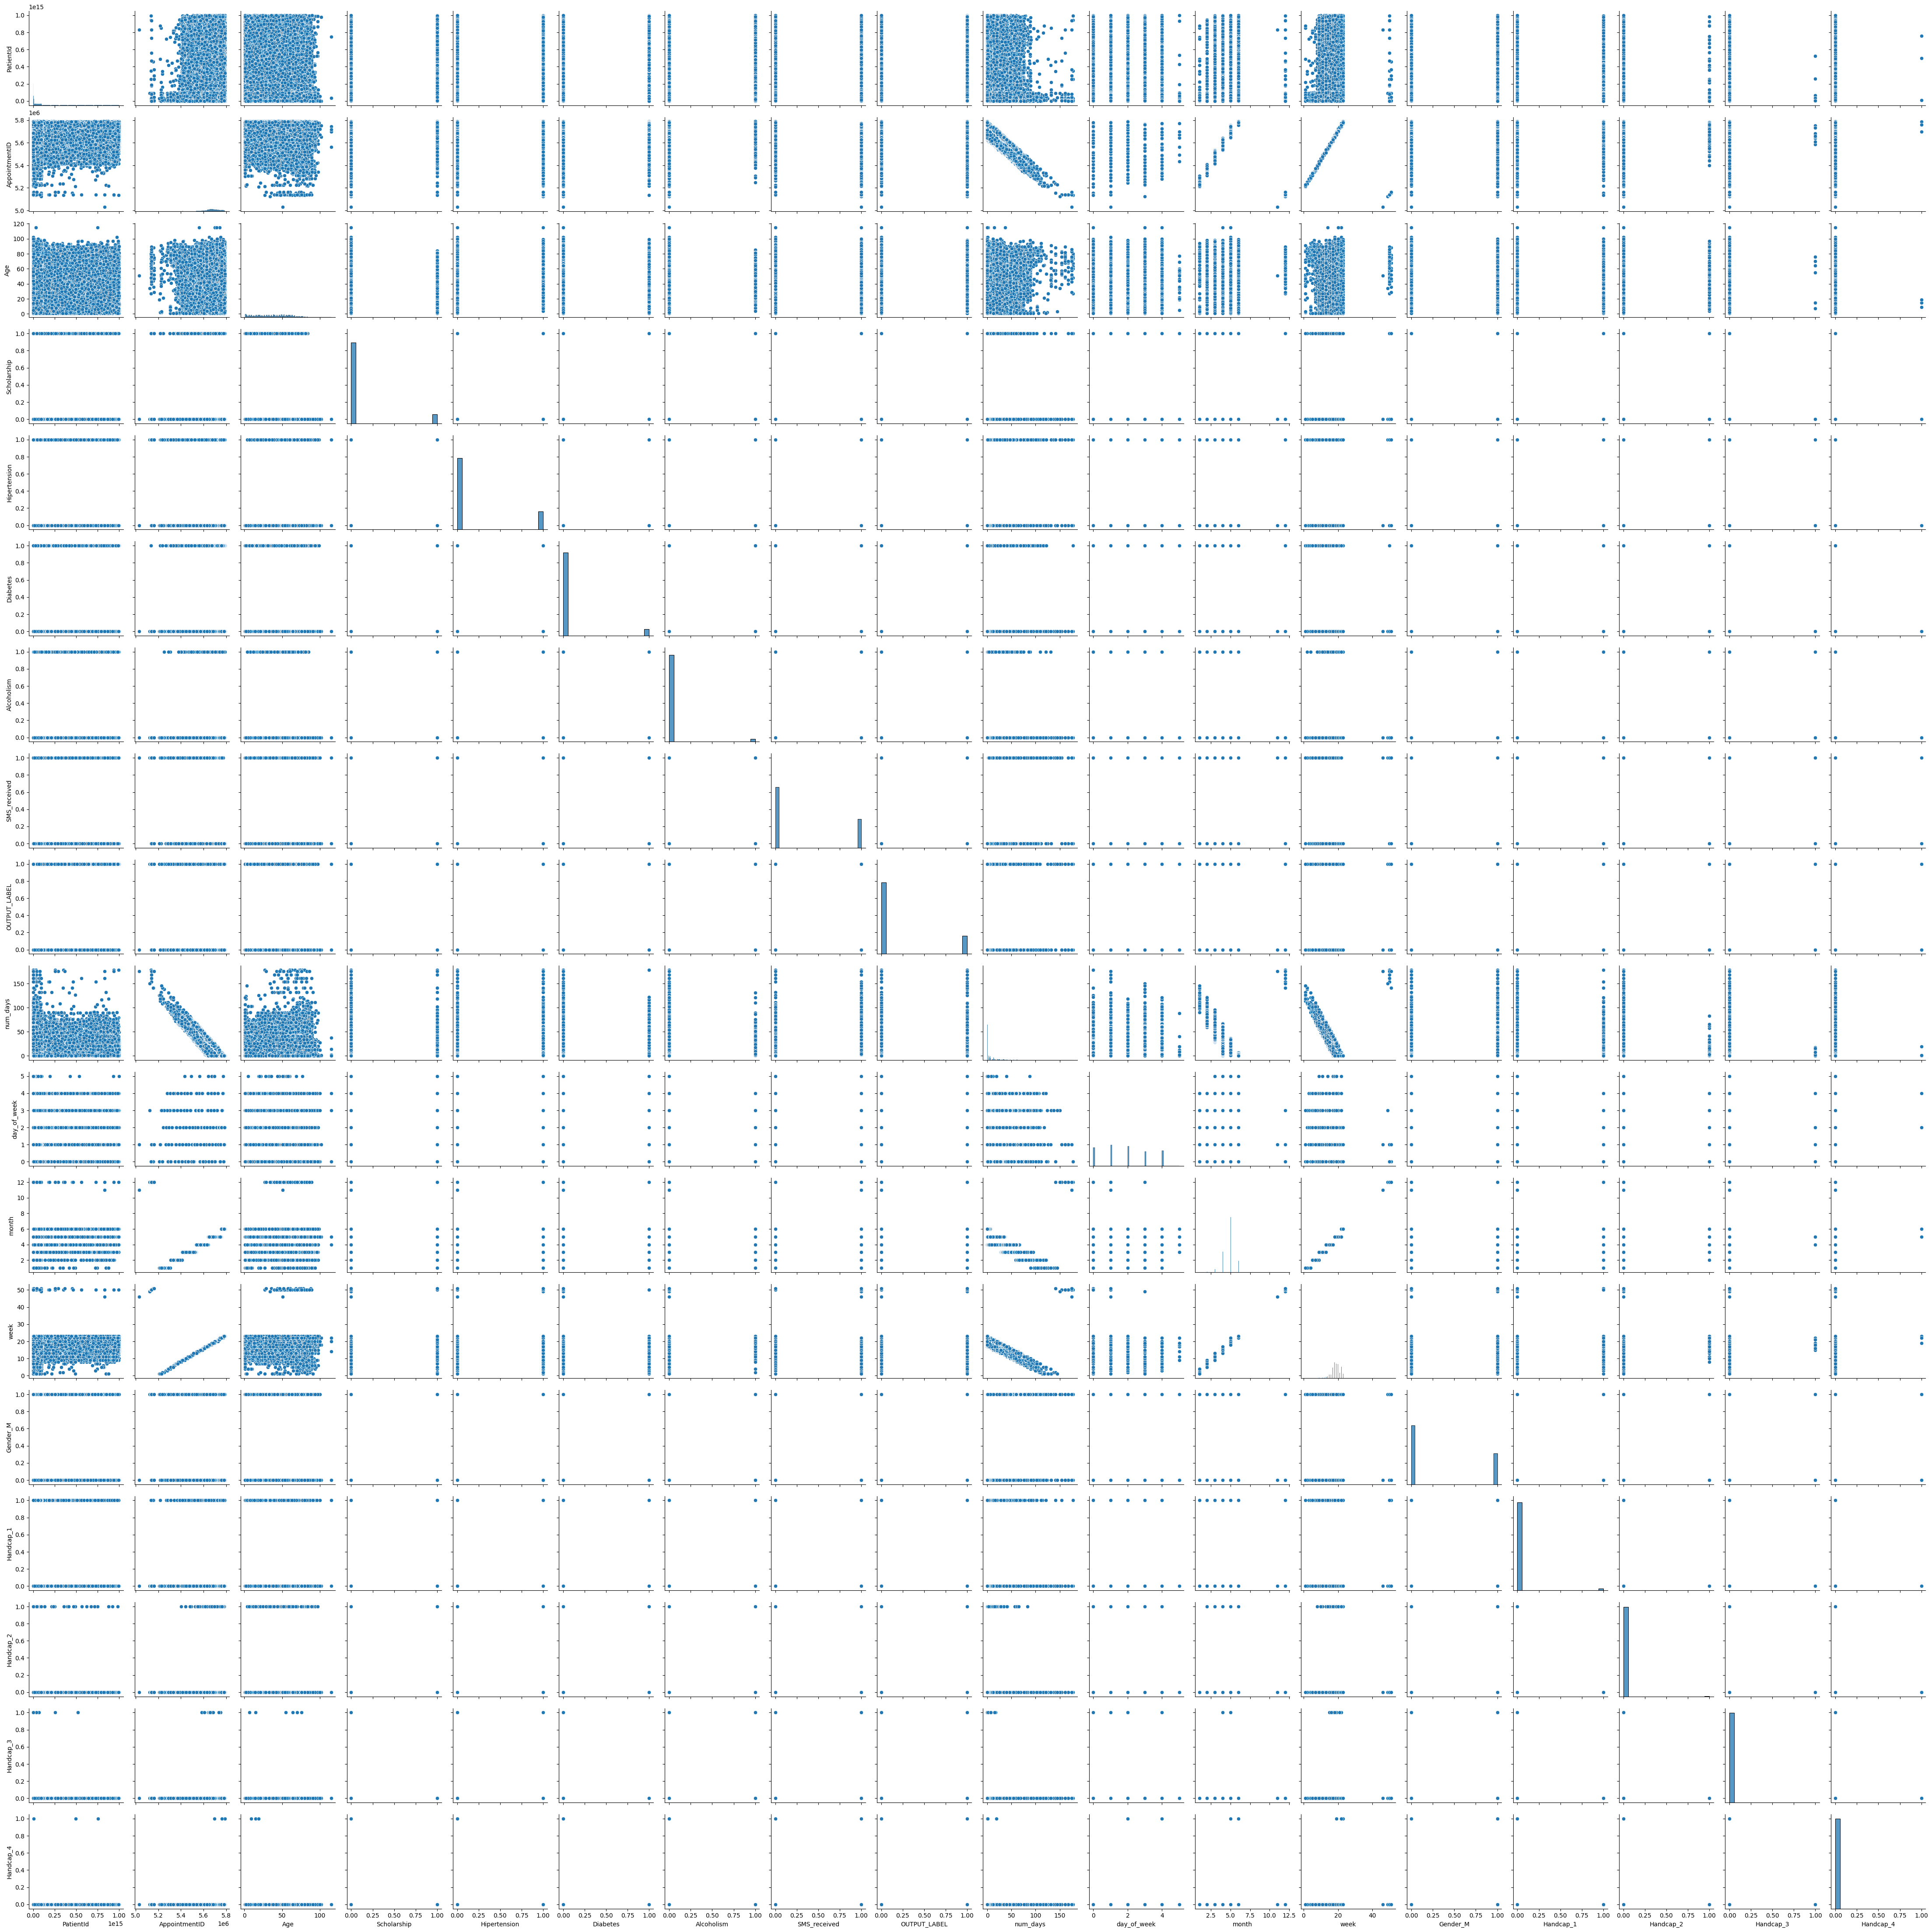

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Visualize data variation with scatter plots
sns.pairplot(df)
plt.show()

# Building Training/Validation/Test Samples

In [37]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [38]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [39]:
#And now split into test and validation using 50% fraction
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [40]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [41]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 16048):0.206
Valid prevalence(n = 16048):0.206
Train all prevalence(n = 74891):0.201


In [42]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 106987)


In [43]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

# merge the balanced data
df_train = pd.concat([df_train_pos.sample(n = n, random_state = 42), 
                      df_train_neg.sample(n = n, random_state = 42)],axis = 0, 
                     ignore_index = True)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 30140):0.500


In [44]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [45]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Filling any missing values with the mean value

In [46]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

Calculate the mean value from the training data.

In [47]:
# your code here
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [48]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,Scholarship,0.101467
2,Hipertension,0.204123
3,Diabetes,0.074468
4,Alcoholism,0.031045


In [49]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (74891, 15)
Training shapes: (30140, 15) (30140,)
Validation shapes: (16048, 15) (16048,)


Create a scalar, save it, and scale the X matrices

In [50]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [51]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [52]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [53]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

In [54]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [55]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

In [56]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [57]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.702
accuracy:0.651
recall:0.646
precision:0.653
specificity:0.641
prevalence:0.500
 
Validation:
AUC:0.688
accuracy:0.650
recall:0.635
precision:0.323
specificity:0.642
prevalence:0.206
 


### Logistic Regression

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(random_state=42)

In [60]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.666
accuracy:0.628
recall:0.572
precision:0.644
specificity:0.683
prevalence:0.500
 
Validation:
AUC:0.668
accuracy:0.664
recall:0.567
precision:0.321
specificity:0.689
prevalence:0.206
 


### Stochastic Gradient Descent

In [61]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [62]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.667
accuracy:0.628
recall:0.566
precision:0.647
specificity:0.691
prevalence:0.500
 
Validation:
AUC:0.670
accuracy:0.667
recall:0.563
precision:0.323
specificity:0.694
prevalence:0.206
 


### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [64]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.648
accuracy:0.500
recall:0.003
precision:0.564
specificity:0.998
prevalence:0.500
 
Validation:
AUC:0.645
accuracy:0.793
recall:0.001
precision:0.143
specificity:0.998
prevalence:0.206
 


### Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [66]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.768
accuracy:0.698
recall:0.768
precision:0.674
specificity:0.619
prevalence:0.500
 
Validation:
AUC:0.707
accuracy:0.624
recall:0.732
precision:0.319
specificity:0.587
prevalence:0.206
 


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [68]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.727
accuracy:0.674
recall:0.819
precision:0.635
specificity:0.530
prevalence:0.500
 
Validation:
AUC:0.724
accuracy:0.591
recall:0.816
precision:0.311
specificity:0.533
prevalence:0.206
 


### Gradient Boosting Classifier

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [70]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.758
accuracy:0.694
recall:0.780
precision:0.665
specificity:0.608
prevalence:0.500
 
Validation:
AUC:0.722
accuracy:0.624
recall:0.766
precision:0.325
specificity:0.587
prevalence:0.206
 


## Analyze results baseline models

In [71]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

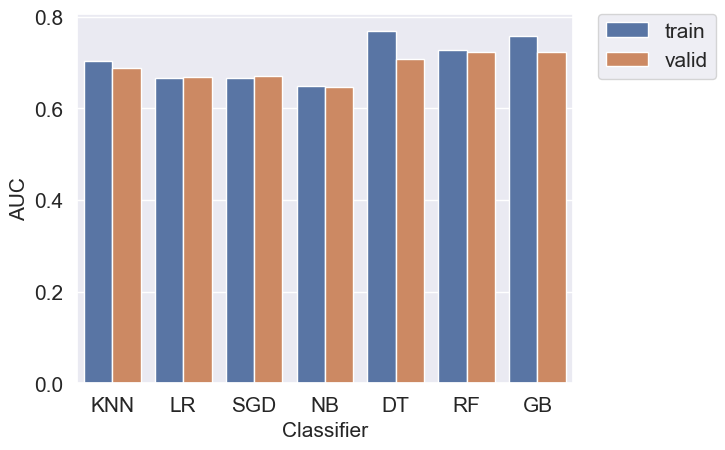

In [73]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

In [74]:
import warnings
warnings.filterwarnings('ignore')

My current best model is: Random Forest

In [75]:
import time

my_params = [2,4,6,8,10]# fill this in your list of parameters

# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
    for i in my_params:
    # fit model
     model= RandomForestClassifier(max_depth = i)                                
     model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

2 4.301685571670532
4 4.385039806365967
6 4.52747368812561
8 4.490011215209961
10 4.802035808563232


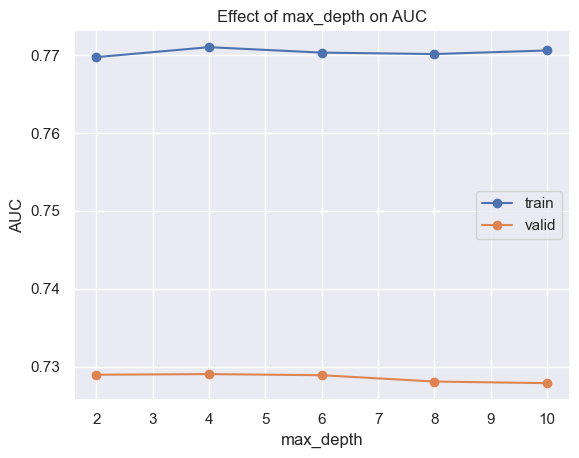

In [76]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('max_depth') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of max_depth on AUC') # fill this in
plt.legend()
plt.show()

## Learning Curves

In [77]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

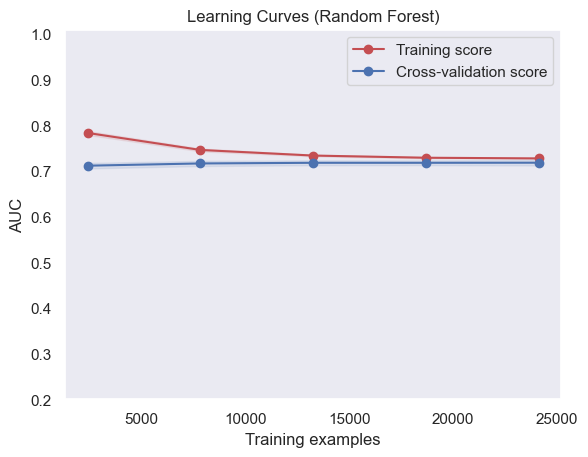

In [78]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = "Learning Curves (Random Forest)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)                                       # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

## Feature Importance

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [80]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
num_days,0.570621
week,0.117642
month,0.114551
SMS_received,0.084081
Age,0.075906


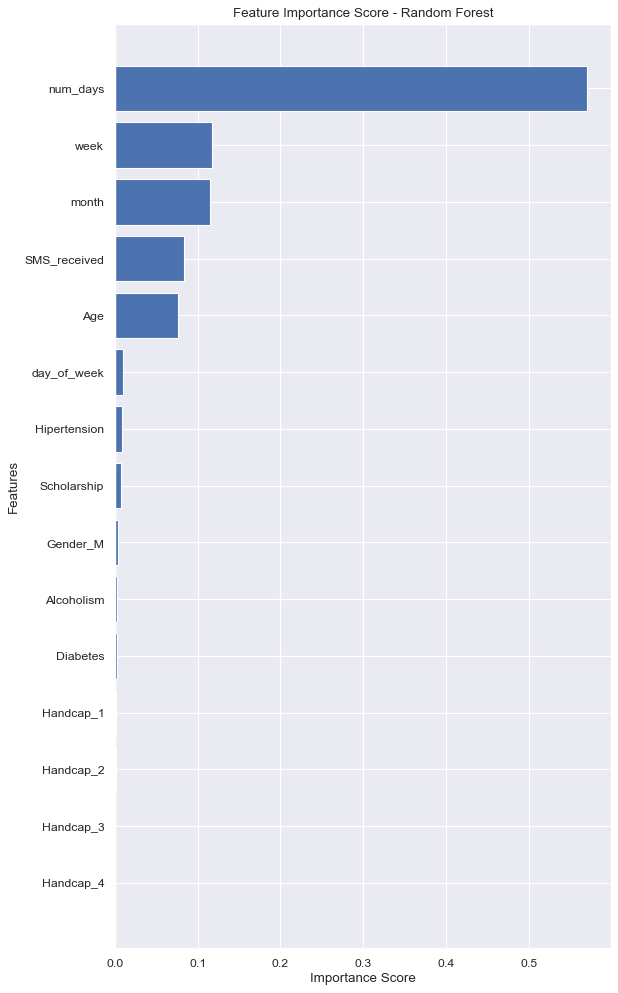

In [81]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

## Hyperparameter tuning RandomizedSearchCV


    
    
Random Forest Optimaization

In [82]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [84]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [85]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [86]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
113.33234786987305


See the best parameters

In [87]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'entropy'}

In [88]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.727
Validation AUC:0.724
Optimized Random Forest
Training AUC:0.802
Validation AUC:0.730


Optimization SGDClassifier

In [89]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [90]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.7146341800689697


In [91]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.01}

In [92]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.667
Validation AUC:0.670
Optimized sgdc
Training AUC:0.666
Validation AUC:0.669


Note that in this case, we donot get a boost on the Validation AUC. 
It looks like this Optimized Random Forest was better. Let's try another model, Gradient Boosting.

Optimize Gradient Boosting Tree Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [94]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

37.09301233291626


In [95]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 1, 'learning_rate': 0.1}

In [96]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.758
Validation AUC:0.722
Optimized gbc
Training AUC:0.722
Validation AUC:0.727


Make a plot comparing the performance of the optimized models to the baseline models. 

In [97]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [98]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.670432
1,SGD,optimized,0.668770
2,RF,baseline,0.723507
3,RF,optimized,0.729599
4,GB,baseline,0.721766
5,GB,optimized,0.727443


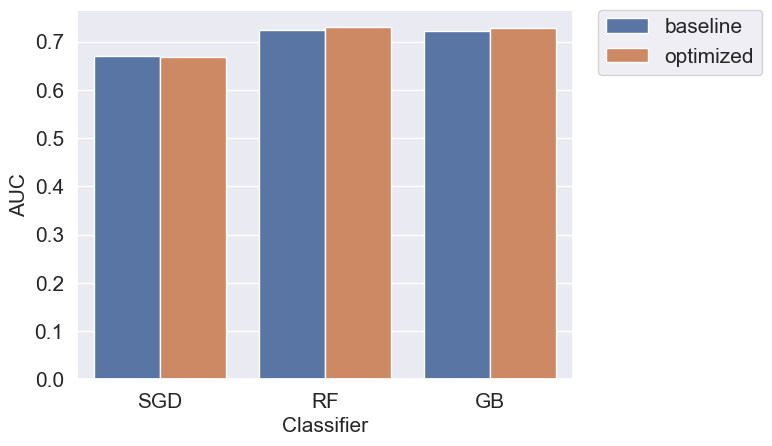

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

In [100]:
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [102]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [103]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Calculate prediction probabilities

In [104]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Evaluate the Performance

In [105]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.802
accuracy:0.723
recall:0.833
precision:0.683
specificity:0.613
prevalence:0.500
 
Validation:
AUC:0.730
accuracy:0.610
recall:0.795
precision:0.320
specificity:0.563
prevalence:0.206
 
Test:
AUC:0.713
accuracy:0.594
recall:0.781
precision:0.308
specificity:0.545
prevalence:0.206
 


Plot the ROC curve

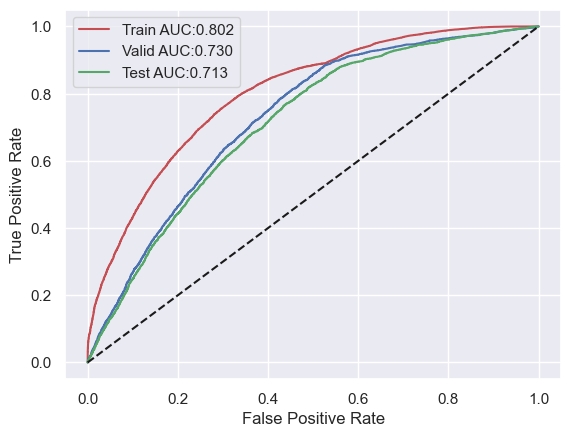

In [106]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()